In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split

In [ ]:
#%% Get dataset
data = pd.read_excel("Sujet1.xlsx",sheet_name=0,header=0,index_col=0)
X=data.dropna() #si j'ai de valeurs manquant je le suprimme
X.info()

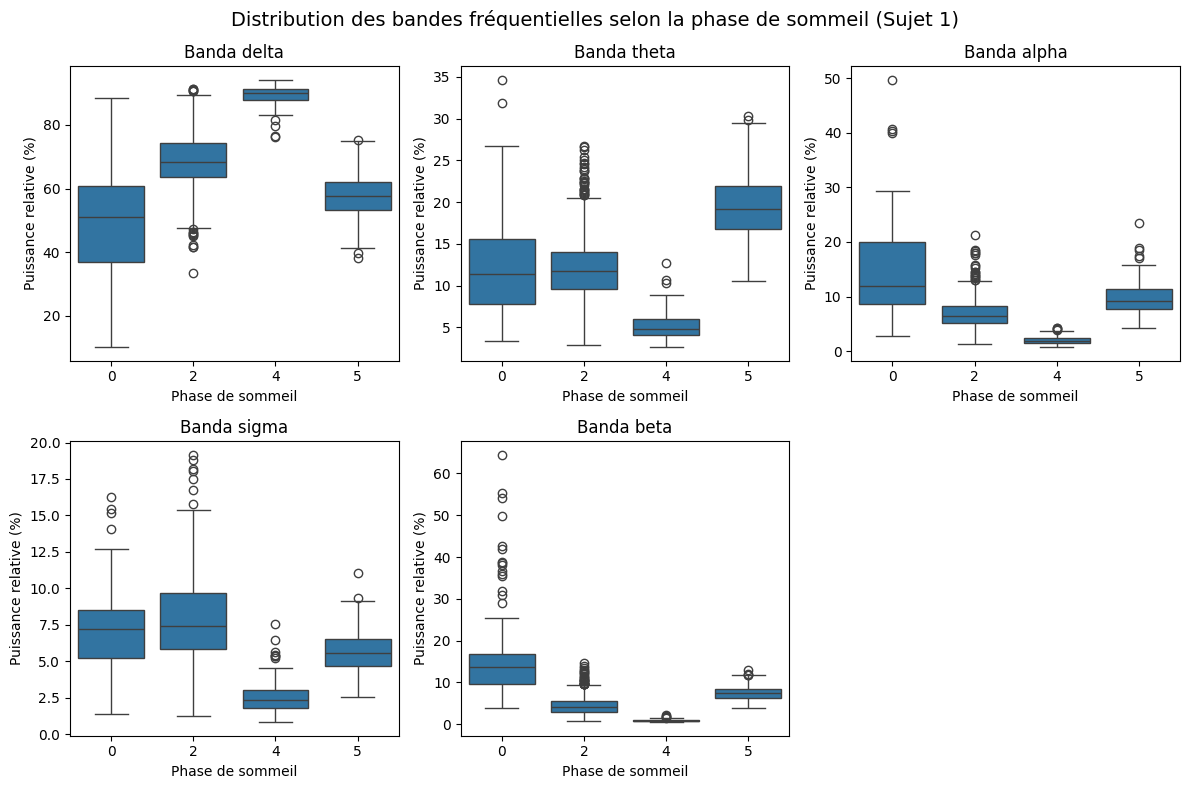

In [5]:
# Boxplots 
#%% Criação dos boxplots
bands = ['delta', 'theta', 'alpha', 'sigma', 'beta']

plt.figure(figsize=(12, 8))

# IA
for i, band in enumerate(bands, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='phase', y=band, data=data)
    plt.title(f'Banda {band}')
    plt.xlabel('Phase de sommeil')
    plt.ylabel('Puissance relative (%)')

plt.suptitle("Distribution des bandes fréquentielles selon la phase de sommeil (Sujet 1)", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:

#%% 
# Analyse discriminante
n,p=X.shape
# Removendo colunas que não queremos analisar
# Alvo -> classe = phase 

y = data['phase']
X = data[['delta', 'theta', 'alpha', 'sigma', 'beta', 'puissance']]
XX =X.drop(columns=['beta']) # no enunciado esta indicado
XX.describe()

lda = LinearDiscriminantAnalysis() # On veut projeter sur 2 axes pour visualiser
X_lda = lda.fit_transform(XX, y)



#%% Visualisation
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_lda[:,0], X_lda[:,1], c=y, cmap='rainbow', alpha=0.7)
plt.xlabel('Axe discriminant 1')
plt.ylabel('Axe discriminant 2')
plt.title('Projection LDA – Phases de sommeil (Sujet 1)')
plt.legend(handles=scatter.legend_elements()[0],
           labels=['Éveil (0)', 'Sommeil léger (2)', 'Sommeil profond (4)', 'Sommeil paradoxal (5)'],
           loc='best')
plt.show()

lda_df = pd.DataFrame(lda.coef_, columns=['delta', 'theta', 'alpha', 'sigma','puissance'],
                      index=['Éveil (0)', 'Sommeil léger (2)', 'Sommeil profond (4)', 'Sommeil paradoxal (5)'])